In [442]:
# Import statements
# https://matplotlib.org/3.1.1/gallery/style_sheets/ggplot.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
from scipy.special import boxcox1p
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import permutation_test_score
from sklearn.metrics import make_scorer
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBClassifier
from scipy.cluster.hierarchy import linkage,dendrogram
plt.style.use('ggplot')

In [364]:
# Reading the Train File
data_train = pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\train.csv')
data_train_copies = pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\train.csv')

In [365]:
# Checking if it is loaded properly
data_train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [366]:
# Reading the Test File
data_test = pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\test.csv')
data_test_copy = pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\test.csv')

# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Pairwise Correlations

In [367]:
# Task 1
# Create a list of features to do a pairwise correlation
correlation_features = data_train[['SalePrice', 'OverallQual', 'YearBuilt', 'BedroomAbvGr', 'FullBath', 'GarageArea', 'GrLivArea', 'Fireplaces', 'TotRmsAbvGrd', 'TotalBsmtSF', '1stFlrSF', 'LotArea']]

In [368]:
correlation_features.head(10)

,SalePrice,OverallQual,YearBuilt,BedroomAbvGr,FullBath,GarageArea,GrLivArea,Fireplaces,TotRmsAbvGrd,TotalBsmtSF,1stFlrSF,LotArea
0,208500,7,2003,3,2,548,1710,0,8,856,856,8450
1,181500,6,1976,3,2,460,1262,1,6,1262,1262,9600
2,223500,7,2001,3,2,608,1786,1,6,920,920,11250
3,140000,7,1915,3,1,642,1717,1,7,756,961,9550
4,250000,8,2000,4,2,836,2198,1,9,1145,1145,14260
5,143000,5,1993,1,1,480,1362,0,5,796,796,14115
6,307000,8,2004,3,2,636,1694,1,7,1686,1694,10084
7,200000,7,1973,3,2,484,2090,2,7,1107,1107,10382
8,129900,7,1931,2,2,468,1774,2,8,952,1022,6120
9,118000,5,1939,2,1,205,1077,2,5,991,1077,7420


In [369]:
# Find pearson correlation matrix
correlation = correlation_features.corr(method ='pearson')

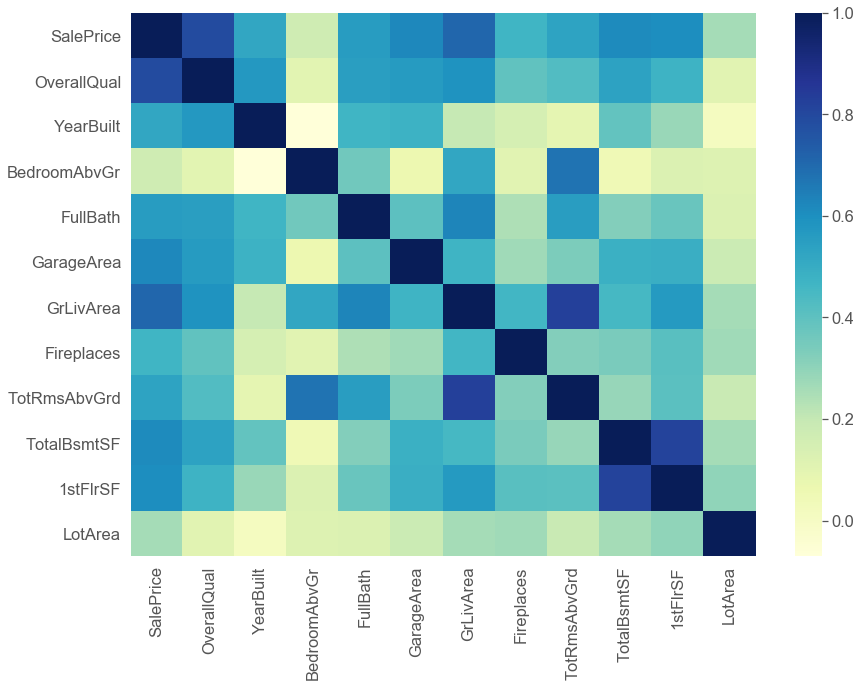

In [370]:
# Create a Heatmap from the features selected above
ax = plt.subplots(figsize=(14, 10))
sns.heatmap(correlation,cmap='YlGnBu')
plt.show()

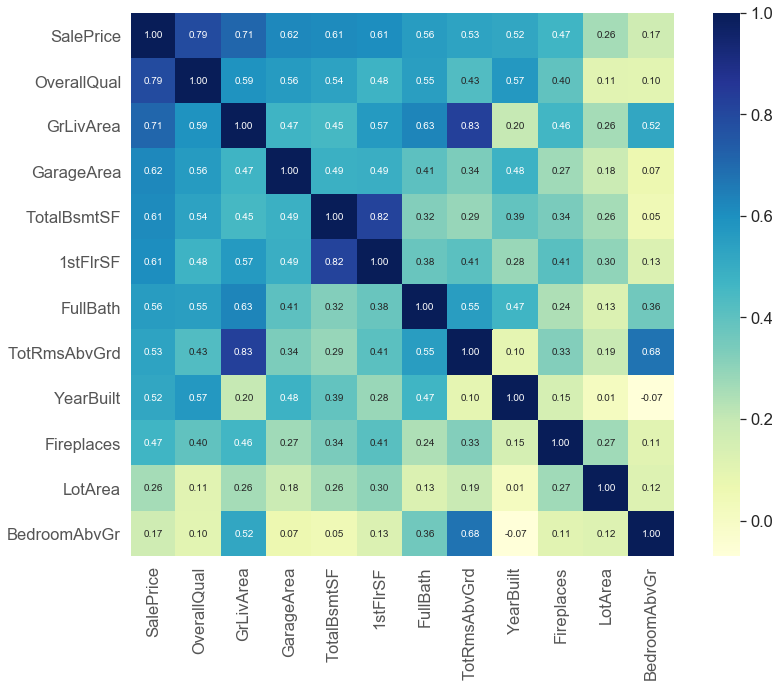

In [371]:
# Create a Heatmap with Correlation Values for better understanding
f  = 12
fig,ax=plt.subplots(figsize=(14,10))
cols = correlation.nlargest(f, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='YlGnBu')
plt.show()

<b>Analysis:</b> As we can see from the heatmap above, features like OverallQual and SalePrice has a positive high correlation(0.79).
Also, TotalBsmtSF and 1stFlrSF has a high pairwise correlation (0.82), along with GrLivArea and TotRmsAbvGrd, who also share positive correlation (0.83) amongst themselves.
                Coming to negative correlation, we see that YearBuilt and BedroomAbvGr show such a trend (-0.07). Low correlation can also be seen between YearBuilt and LotArea (0.01).

## Part 2 - Informative Plots

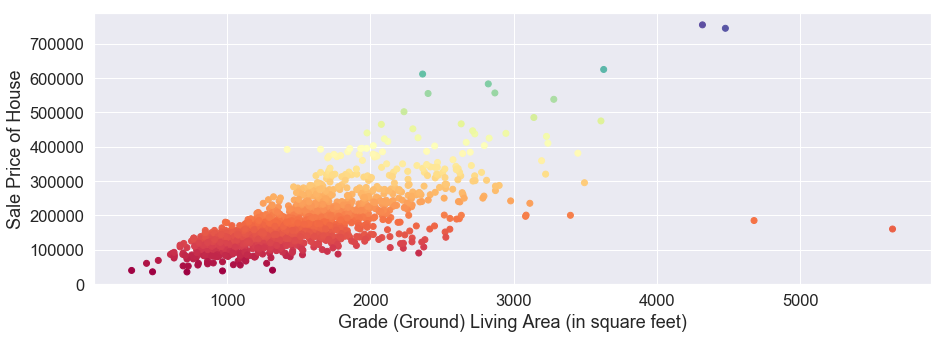

In [372]:
# Task 2
# Plot 1
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
# Scatter Plot showing sales price vs TotalBsmtSF
ax = plt.subplots(figsize=(15, 5))
xax = data_train['GrLivArea']
yax = data_train['SalePrice']
plt.scatter(xax, yax, c=yax, alpha=1, cmap='Spectral')
plt.xlabel('Grade (Ground) Living Area (in square feet)')
plt.ylabel('Sale Price of House')
plt.show()

<b>Analysis of Plot 1:</b> From the scatterplot, we can infer that Grade (Ground) Living Area plays a huge role in the sale price of the House. A low Grade Living Area leads to a low Sale Price. The houses with close to zero ground living area leads to sale price being zero as well.

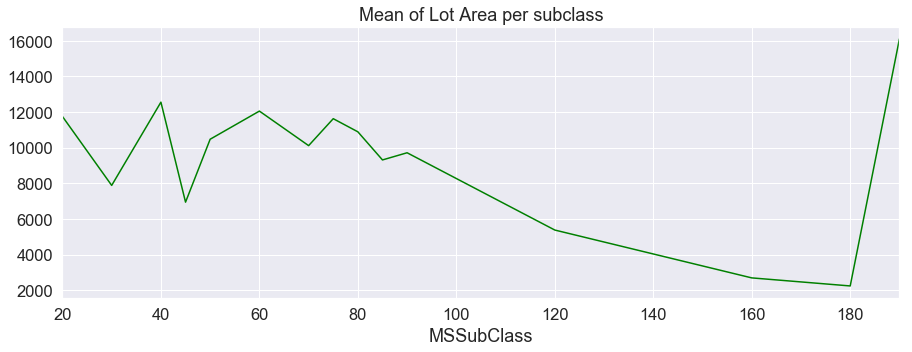

In [373]:
# Plot 2
# https://matplotlib.org/tutorials/introductory/pyplot.html
data_train.groupby('MSSubClass') \
    .mean()['LotArea'] \
    .plot(kind='line', title='Mean of Lot Area per subclass', figsize = (15,5), color = 'Green')
plt.show()

<b>Analysis of Plot 2:</b> MSSubClass is a field in the dataset that identifies the type of dwelling involved in the sale. For e.g.: Split Foyer, Duplex, etc. In this Line plot, I show how this MSSubClass gives us an idea of the Lot Area of the house. We see that MSSubClass 190 which refers to 2 FAMILY CONVERSION - ALL STYLES AND AGES, has the highest average lot area amongst all types of houses. On the other hand, MSSubClass 180 which refers to PUD - MULTILEVEL - INCL SPLIT LEV/FOYER has the lowest average lot area. <br> <br>
<i>MSSubClass Key:</i> <br> 
        20	   1-STORY 1946 & NEWER ALL STYLES <br>
        30	   1-STORY 1945 & OLDER <br>
        40	   1-STORY W/FINISHED ATTIC ALL AGES <br>
        45	   1-1/2 STORY - UNFINISHED ALL AGES <br>
        50	   1-1/2 STORY FINISHED ALL AGES <br>
        60	   2-STORY 1946 & NEWER <br>
        70	   2-STORY 1945 & OLDER <br>
        75	   2-1/2 STORY ALL AGES <br>
        80	   SPLIT OR MULTI-LEVEL <br>
        85	   SPLIT FOYER <br>
        90	   DUPLEX - ALL STYLES AND AGES <br>
       120	   1-STORY PUD (Planned Unit Development) - 1946 & NEWER <br>
       150	   1-1/2 STORY PUD - ALL AGES <br>
       160	   2-STORY PUD - 1946 & NEWER <br>
       180	   PUD - MULTILEVEL - INCL SPLIT LEV/FOYER <br>
       190	   2 FAMILY CONVERSION - ALL STYLES AND AGES <br>

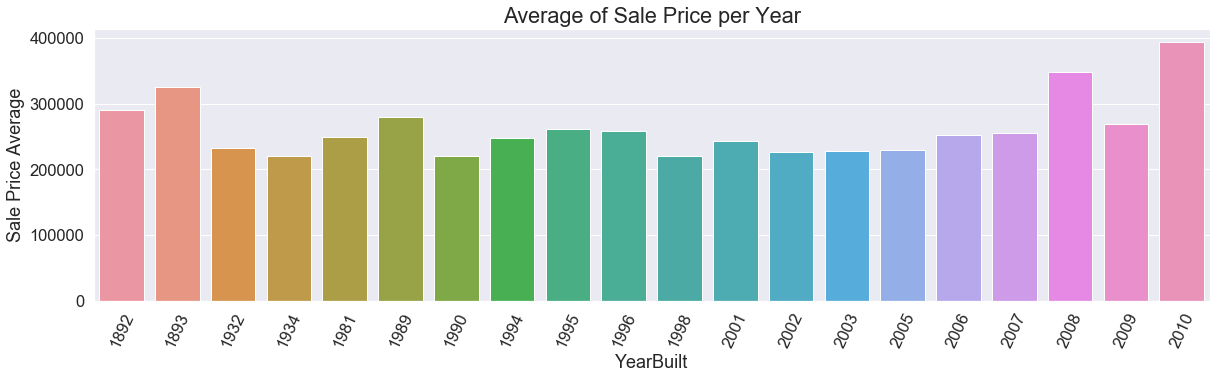

In [374]:
# Plot 3
# https://seaborn.pydata.org/generated/seaborn.barplot.html
# https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf 
salepriceperyear = pd.DataFrame()
salepriceperyear['Sale Price Average'] = data_train.groupby(['YearBuilt'])['SalePrice'].mean()
salepriceperyear['YearBuilt'] = salepriceperyear.index
group_top = salepriceperyear.sort_values(by='Sale Price Average',ascending=False).head(20)

plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
sns.set(font_scale = 1.5)
ax = sns.barplot(x="YearBuilt", y="Sale Price Average", data=group_top)

font_size= {'size': 'large'}
ax.set_title("Average of Sale Price per Year", **font_size)
xt = plt.xticks(rotation=65)

<b>Analysis of Plot 3:</b> In this Bar Plot, what I tried to do is to see whether I can find the relation between the Average Sale Price by the Year Built. Unsurprisingly, the houses which are newly built have a higher sale price. However some antique houses built in the years of 1893 and 1892 also have a high value, and in some cases more than houses built during the years of 1996-2007.

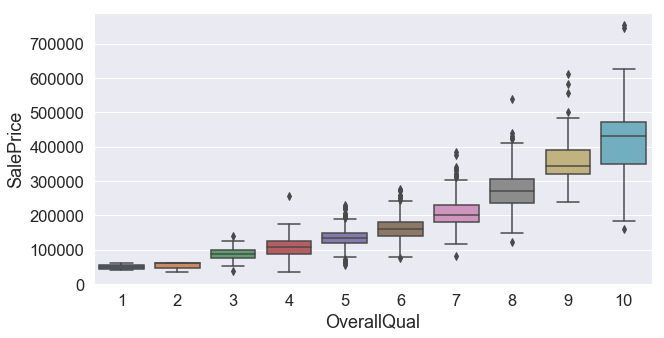

In [375]:
# Plot 4
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html
box_plot = pd.concat([data_train['SalePrice'], data_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(10,5))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=box_plot)
plt.show()

<b>Analysis of Plot 4:</b> We know that a boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). That's the same thing I am potraying in the boxplot. It shows us the above 5 measures of SalePrice with respect to OverallQual of the house. What I found interesting that although it shows a symmetrical plot, that all the 5 measures increase with respect to quality, there is some anomaly as well. We have some houses in the dataset which have an overall quality of 10, yet its price is less than many houses which have overall quality of 9.

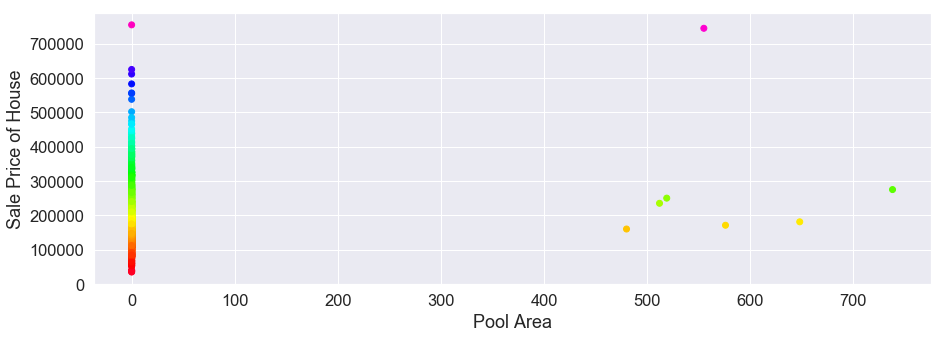

In [376]:
# Plot 5
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
# Scatter Plot showing sales price vs TotalBsmtSF
ax = plt.subplots(figsize=(15, 5))
xax = data_train['PoolArea']
yax = data_train['SalePrice']
plt.scatter(xax, yax, c=yax, alpha=1, cmap='gist_rainbow')
plt.xlabel('Pool Area')
plt.ylabel('Sale Price of House')
plt.show()

<b>Analysis of Plot 5:</b> I find this scatterplot interesting because it tells us one thing for sure, and that is, pool area plays almost no role at all in the sale price of the houses in the dataset. It also shows us that most of the houses at Ames doesn't have a pool at all.

## Part 3 - Handcrafted Scoring Function

# Task 3
For Desirability, I have chosen five features which I think, will influence the desirability of the houses. The features are:

1. OverallQual: This feature rates the overall material and finish of the house. The higher the number the better it is in terms of desirability. For Eg.: 10 is Very Excellent, 9 is Excellent and so on.
2. YearBuilt: YearBuilt is the original construction date. A higher value of this means that the construction is newer. I am assuming that a newer construction is more desirable than an older construction. 
3. BedroomAbvGr: This feature stands for Bedroom above Grade. In real estate, above grade means the portion of a house that is
above the ground. It is quite obvious that a greater number of bedrooms will increase its desirability.
4. GrLivArea: GrLivArea is the above grade (ground) living area in square feet. More the GrLivArea, greater is the Sale Price.
5. FullBath: FullBath is the number of Full bathrooms above grade. FullBath is directly proportional to the desirability of the house.

I have ranked the above features in the following manner:
OverallQual>BedroomAbvGr>YearBuilt>GrLivArea>FullBath

With the above ranking, I have used a weighing mechanism to compute the sum of scores in my scoring function.

In [377]:
# Extract the features to be used in my scoring function
score_col_with_id = ['Id','OverallQual','YearBuilt','BedroomAbvGr','GrLivArea','FullBath']
score_col = ['OverallQual','YearBuilt','BedroomAbvGr','GrLivArea','FullBath']
desirability_index = pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\train.csv', usecols=score_col_with_id)
normalized_desirability_index = pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\train.csv', usecols=score_col_with_id)

In [378]:
# Drop NaN values to clean the data
desirability_index = desirability_index.dropna(axis=0, how='any')
normalized_desirability_index = normalized_desirability_index.dropna(axis=0, how='any')

In [379]:
# Next we normalize our data
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scale = MinMaxScaler()
normalized_desirability_index[score_col] = scale.fit_transform(normalized_desirability_index[score_col])

In [380]:
# Next, I will create my scoring function by giving weights to the individual features I had selected above. My scoring function
# works as follows: Σ(Weight of feature * Value of Feature)
feature_weight = pd.DataFrame(pd.Series([0.6, 0.3, 0.5, 0.2, 0.1],index=score_col, name='feature_weight'))

In [381]:
feature_weight

,feature_weight
OverallQual,0.6
YearBuilt,0.3
BedroomAbvGr,0.5
GrLivArea,0.2
FullBath,0.1


In [382]:
# Add the score index with the corresponding scores generated by my scoring function
normalized_desirability_index['score'] = normalized_desirability_index[score_col].dot(feature_weight)

In [383]:
# Now I will replace my normalized desirability index with my actual desirability index
desirability_index = pd.merge(normalized_desirability_index[['Id','score']], desirability_index, on='Id', how='left')

In [384]:
# Once my desirability index is prepared, I am first sorting the values by their scores
desirability_index = desirability_index.sort_values(['score'], ascending=False)

In [385]:
# Now, I am getting the Top 10 desirable houses
desirability_index.head(10)

,Id,score,OverallQual,YearBuilt,GrLivArea,FullBath,BedroomAbvGr
1182,1183,1.375632,10,1996,4476,3,4
691,692,1.365255,10,1994,4316,3,4
1298,1299,1.349819,10,2008,5642,2,3
523,524,1.344580,10,2007,4676,3,3
1169,1170,1.341468,10,1995,3627,3,4
798,799,1.284713,9,2008,3140,3,4
58,59,1.277184,10,2006,2945,3,3
803,804,1.272731,9,2008,2822,3,4
1046,1047,1.267942,9,2005,2868,3,4
320,321,1.259868,9,2006,2596,3,4


<b>Analysis of Top 10 Desirable Houses:</b>
We can see that the overall quality index does play a huge role in the desirability of a house. The better the quality, the more the customers want to buy such a house. Also, most customers want more number of bedrooms above grade, which in a way leads to a greater number of Full Bathrooms in most cases, hence these two factors also influence heavily on the desirability of a house. Finally, we see that the most desirable houses are built after 1990.

In [386]:
# Now, I am getting the Least 10 desirable houses
desirability_index.tail(10)

,Id,score,OverallQual,YearBuilt,GrLivArea,FullBath,BedroomAbvGr
29,30,0.422407,4,1927,520,1,1
106,107,0.413459,4,1885,1047,1,2
620,621,0.402941,3,1914,864,1,2
1380,1381,0.402941,3,1914,864,1,2
968,969,0.398164,3,1910,968,1,2
636,637,0.319189,2,1936,800,1,1
916,917,0.302059,2,1949,480,0,1
1100,1101,0.270766,2,1920,438,1,1
533,534,0.256703,1,1946,334,1,1
375,376,0.192673,1,1922,904,0,1


<b>Analysis of Least 10 Desirable Houses:</b>
We can see that the least 10 desirable houses paint the exact opposite picture than what the top 10 desirable houses potrayed.
The houses in this list has an Overall Quality Index less than 5. Also, the number of bedrooms above grade is less than 3. We 
also see that the number of full bathrooms is very less or in some cases there is no full bathroom at all. Finally, we see that 
the least desirable houses are built before 1950. This makes it clear that old houses have the least desirability.

## Part 4 - Pairwise Distance Function

# Task 4
# https://en.wikipedia.org/wiki/Euclidean_distance
# https://en.wikipedia.org/wiki/Taxicab_geometry
# https://en.wikipedia.org/wiki/Minkowski_distance
In this task, let's explore pairwise distance between data rows. While choosing distance function I explored the various
distance measures available, which are as follows: 
1. Euclidean Distance
2. Manhattan Distance
3. Minkowski Distance

I found Euclidean Distance to be the most convenient for this dataset as it has some advantages over other metrics:
a. <b>Manhattan Distance</b>
    This distance metric calculates the distance between two points by taking absolute difference between the data points. 
    But as the features in this dataset has sparse values, taking absolute difference in this case could lead to large and 
    unintelligible results.

b. <b>Minkowski Distance</b>
    This distance metric calculates the distance between two points by combining the properties of both Manhattan and Euclidean 
    Distance. However, this also leads to requires choosing some external parameters. The results of the function depends on 
    other external factors, which can can result in some complex computations.

    
## Euclidean Distance
 The Euclidean distance between points p and q is the length of the line segment connecting them. 
 The standard Euclidean distance can be squared in order to place progressively greater weight on objects that are  farther 
 apart. Squared Euclidean Distance is not a metric as it does not satisfy the triangle inequality, however, it  is frequently 
 used in optimization problems in which distances only have to be compared.

## Advantages of Euclidean Distance:
 a. When data is dense or continuous, this is the best proximity measure.
 b. Euclidean distance can be extended to any dimensions of the data.
 c. Euclidean distance is an implicit distance measure in many clustering implementation.
    
    
 <b> Pairwise distance on Ames Housing Dataset using Euclidean Distance Metric<b>

 <b> Features to be used as input for my distance function <b>
I inspected several features in the dataset to select the most relevant features that can be used as inputs to my distance 
function. My aim was to select features which have a highest influence on the similarity between two properties.
The features are as follows:
   - OverallQual 
   - YearBuilt 
   - BedroomAbvGr 
   - GrLivArea 
   - FullBath 
   - 1stFlrSF
    
# Applying Euclidean Distance Function
 I used scipy library's pdist method to apply the euclidean distance function on this dataset, whereby I passed 'euclidean' as the distance metric. This brought about a 1460 * 1460 distance matrix, the observations of which are noted below. I also plotted a 20 * 20 heatmap to better visualize the data.

# Evaluation
   - I observed that the inputs I selected brought about a very sparse matrix of distances between the points. While the white region represents a distance of 0 or close to 0 , darker purple regions depicts a large distance.
   - The diagonal of the matrix represents the same points. Hence the distance is 0 and the color is white. This verifies that the distance function performs accurately.

In [387]:
# Task 4
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
from scipy.spatial.distance import pdist, squareform
distance_df=data_train[score_col]
distance_df = (distance_df - distance_df.min()) / (distance_df.max() - distance_df.min())
distances = pdist(distance_df.values, metric='euclidean')
distances.shape
distance_matrix = pd.DataFrame(squareform(distances))
distance_matrix

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
0,0.000000,0.240310,0.020373,0.719549,0.192082,0.482227,0.111388,0.228876,0.536640,0.636727,...,0.330768,0.119486,0.436779,0.415329,0.155449,0.115441,0.223252,0.481207,0.581202,0.493593
1,0.240310,0.000000,0.234328,0.571134,0.355455,0.448873,0.311728,0.192747,0.378956,0.460633,...,0.195322,0.326645,0.429563,0.413816,0.263055,0.181765,0.153474,0.365432,0.419261,0.360294
2,0.020373,0.234328,0.000000,0.706855,0.184521,0.482426,0.114537,0.210827,0.522426,0.629133,...,0.321386,0.128274,0.441648,0.420260,0.165613,0.115072,0.207478,0.464278,0.574881,0.488382
3,0.719549,0.571134,0.706855,0.000000,0.725726,0.660171,0.734443,0.541011,0.374558,0.331348,...,0.599254,0.760461,0.710707,0.704297,0.742563,0.702952,0.579972,0.419534,0.379242,0.433821
4,0.192082,0.355455,0.184521,0.725726,0.000000,0.624681,0.159627,0.258195,0.575523,0.724371,...,0.390459,0.180635,0.575357,0.528646,0.331005,0.275383,0.301624,0.442548,0.678616,0.577639
5,0.482227,0.448873,0.482426,0.660171,0.624681,0.000000,0.543128,0.512648,0.619671,0.414279,...,0.526550,0.546070,0.161776,0.270413,0.427993,0.436727,0.464450,0.690691,0.339969,0.322594
6,0.111388,0.311728,0.114537,0.734443,0.159627,0.543128,0.000000,0.261483,0.554999,0.687905,...,0.417536,0.036301,0.501629,0.483038,0.189503,0.225331,0.299963,0.501193,0.635951,0.555787
7,0.228876,0.192747,0.210827,0.541011,0.258195,0.512648,0.261483,0.000000,0.334360,0.522725,...,0.261174,0.293214,0.516402,0.499709,0.304778,0.234111,0.116913,0.267607,0.490149,0.434214
8,0.536640,0.378956,0.522426,0.374558,0.575523,0.619671,0.554999,0.334360,0.000000,0.425555,...,0.457149,0.583666,0.682297,0.696960,0.539147,0.520912,0.383586,0.281285,0.443445,0.496330
9,0.636727,0.460633,0.629133,0.331348,0.724371,0.414279,0.687905,0.522725,0.425555,0.000000,...,0.506044,0.704809,0.478262,0.501481,0.618938,0.582794,0.504142,0.528981,0.079710,0.228602


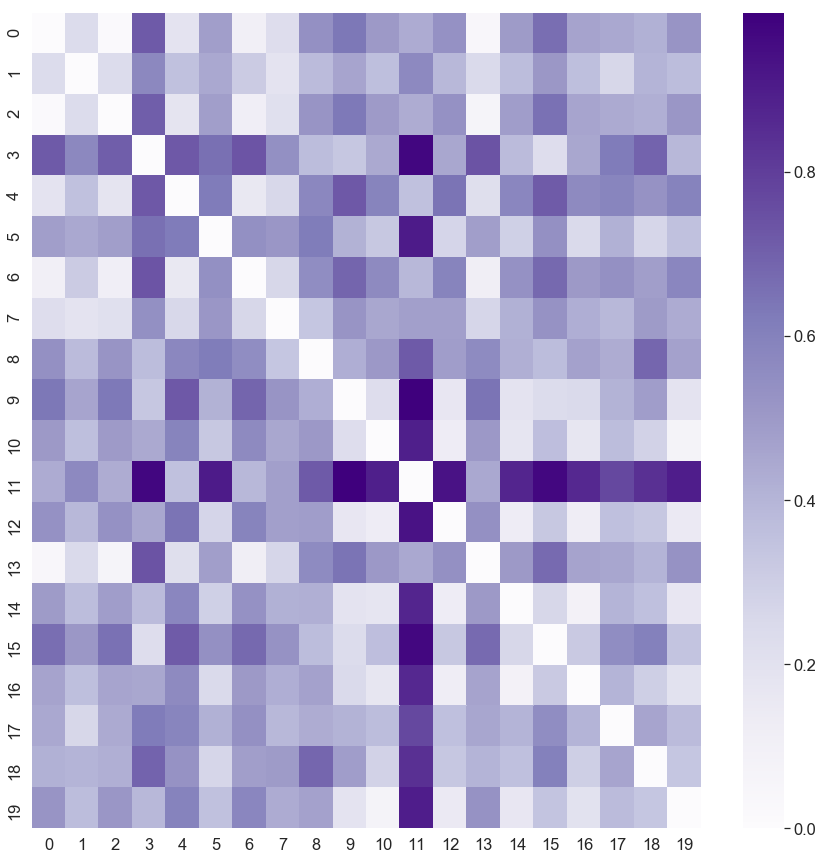

In [388]:
# Representing the above with a Heatmap
heatmap_distance_matrix = distance_matrix.iloc[:20, :20]
plt.figure(figsize=(15,15))
sns.heatmap(heatmap_distance_matrix, square=False, cmap='Purples')
plt.show()

## Part 5 - Clustering

# Task 5
# Clustering
# In this task, I will cluster the data. By this, I hope to bring out the underlying structural similarities within the data.
# https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
# https://en.wikipedia.org/wiki/K-means_clustering
## K Means Clustering Algorithm
K-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the 
nearest mean, serving as a prototype of the cluster.his results in a partitioning of the data space into Voronoi cells. k-Means 
minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more 
difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. 
Better Euclidean solutions can for example be found using k-medians and k-medoids.

The most common algorithm uses an iterative refinement technique. Due to its ubiquity it is often called the k-means algorithm;
it is also referred to as <b>Lloyd's algorithm</b>, particularly in the computer science community.
Given an initial set of k means the algorithm proceeds by alternating between two steps:
 1. Assignment Step :
     Assign each observation to the cluster whose euclidean distance with the mean of cluster is minimum.
 2. Update Step :
     After assigning each points to the cluster, calculate the new means for each cluster.
 
 Initialization methods:
    There are couple of methods to initialize the clustering algorithm:
    a. Forgy Partition - Randomly choose k observations and choose them as means for each cluster.
    b. Random Partition - Randomly assign each obervation a cluster and then update means of clusters.

# Applying K-Means on this Dataset
1. Before we proceed, the first step is to reduce the dimensions of the data to visualize it better using Principal Component 
Analysis (PCA).

# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# https://en.wikipedia.org/wiki/Principal_component_analysis
# Principle Component Analysis (PCA)
Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of 
observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values 
of linearly uncorrelated variables called principal components.

A very high-level description of PCA is that it serves as a dimensionality reduction method on the features of our original 
dataset by projecting these features onto a lower dimension.

2. The next step is to cluster the reduced data using K-means to 10 classes and assigned labels from 0 to 9 to each of our 
property data points.

3. The final step is to visualize the clustering. For this, I am going to use a dendogram and a scatter plot. Cluster data points are represented in plot with different colors.

In [443]:
# Task 5
PCA_reduced_data = PCA(n_components=2).fit_transform(distance_df)
kmeanscluster = KMeans(n_clusters=10, random_state=0).fit(PCA_reduced_data)
cluster_labels = kmeanscluster.predict(PCA_reduced_data)
distance_df.loc[:, 'cluster label'] = cluster_labels

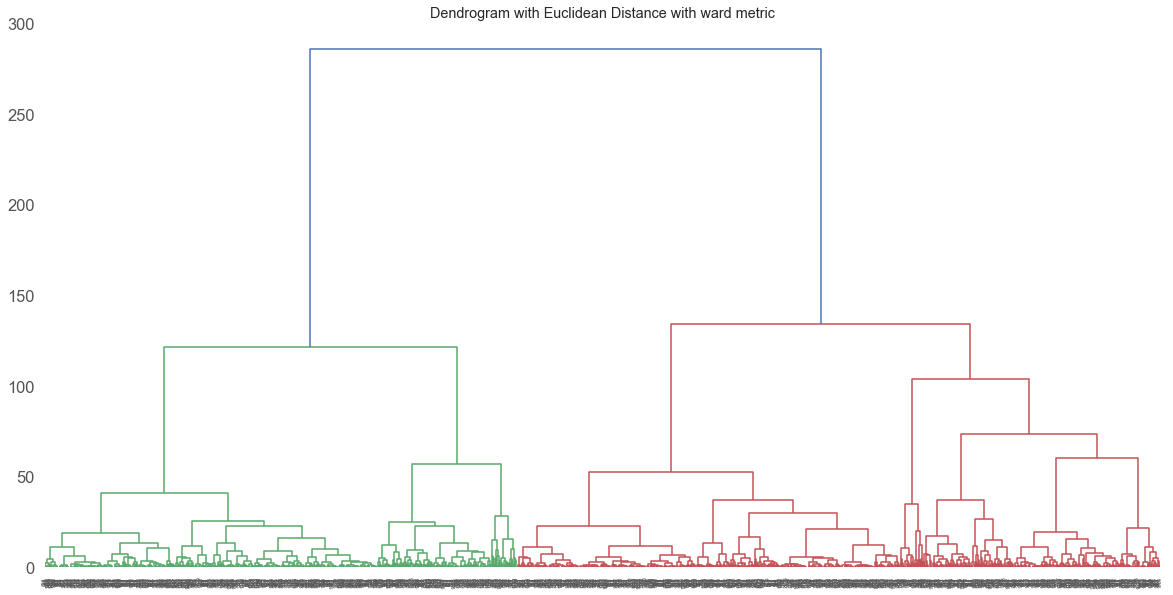

In [444]:
plt.figure(figsize=(20,10))
linkage_matrix_ward = linkage(distance_matrix, "ward")
dendrogram(linkage_matrix_ward)
plt.title("Dendrogram with Euclidean Distance with Ward metric")
plt.show()

In [304]:
distance_func_data

,OverallQual,YearBuilt,BedroomAbvGr,GrLivArea,FullBath,cluster label
0,7,2003,3,1710,2,6
1,6,1976,3,1262,2,5
2,7,2001,3,1786,2,6
3,7,1915,3,1717,1,6
4,8,2000,4,2198,2,3
5,5,1993,1,1362,1,5
6,8,2004,3,1694,2,6
7,7,1973,3,2090,2,7
8,7,1931,2,1774,2,6
9,5,1939,2,1077,1,9


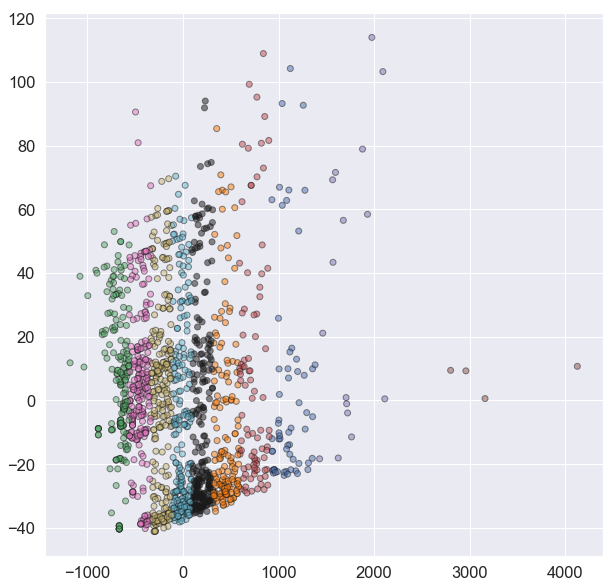

In [305]:
figure = plt.figure(figsize=(10, 10))
colorkey = {1: 'c', 2: 'b', 3: 'g', 4: 'r', 5: 'm', 6: 'y',7:'k',8:'tab:orange',9:'tab:brown',10:'tab:pink'}

# colors = map(lambda x: colmap[x+1], labels)
colors = [colorkey[x+1] for x in cluster_labels]
plt.scatter(PCA_reduced_data[:,0], PCA_reduced_data[:,1], c=colors, alpha=0.5, edgecolor='k')
#for idx, centroid in enumerate(centroids):
    #plt.scatter(*centroid, c='w', marker='x',zorder=10, s=170)
plt.show()

<b> Analysis: </b> I have used two types of visualization schemes to potray the clustering of the houses. First I used a dendrogram. A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters. Structurally, in a dendrogram, the clade is the branch. Each clade has one or more leaves.In simple terms, the clades are arranged according to how similar (or dissimilar) they are. Clades that are close to the same height are similar to each other; clades with different heights are dissimilar — the greater the difference in height, the more dissimilarity.

Secondly, I used a scatter plot. We can see from the scatterplot that the houses with similar neighbourhoods are clustered together and share the same color scheme in the plot.

<b> Preprocessing Techniques: </b>

In [389]:
# Before I move on to building my first prediction model, I would start off by preprocessing the data.
# First, I take a look at the data carefully, specifically its types.
train_test_combi=pd.concat([data_train,data_test], sort=False)
train_test_combi.select_dtypes(include='object').head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [390]:
train_test_combi.select_dtypes(include=['float','int']).head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0,208500.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0,181500.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0,223500.0
3,60.0,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0,140000.0
4,84.0,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0,250000.0


In [391]:
# Next I will check for null values in categorical columns
train_test_combi.select_dtypes(include='object').isnull().sum()[train_test_combi.select_dtypes(include='object').isnull().sum()>0]

MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [392]:
# Next I will fill such Null values with the string 'None', for both train and test datasets
for columns in ('Alley','Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
           'PoolQC','Fence','MiscFeature'):
    data_train[columns]=data_train[columns].fillna('None')
    data_test[columns]=data_test[columns].fillna('None')

In [393]:
# Further, for some columns which are not available I will fill them with the 'Mode' Value
for columns in ('MSZoning','Exterior1st','Exterior2nd','KitchenQual','SaleType','Functional'):
    data_train[columns]=data_train[columns].fillna(data_train[columns].mode()[0])
    data_test[columns]=data_test[columns].fillna(data_train[columns].mode()[0])

In [394]:
# Next I will check for null values in numerical columns
train_test_combi.select_dtypes(include=['int','float']).isnull().sum()[train_test_combi.select_dtypes(include=['int','float']).isnull().sum()>0]

LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

In [395]:
# For columns with 'None', I will fill them with 0
for columns in ('MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea'):
    data_train[columns]=data_train[columns].fillna(0)
    data_test[columns]=data_test[columns].fillna(0)

In [396]:
# For the column LotFrontage, I will replace with Mean
data_train['LotFrontage']=data_train['LotFrontage'].fillna(data_train['LotFrontage'].mean())
data_test['LotFrontage']=data_test['LotFrontage'].fillna(data_train['LotFrontage'].mean())

In [397]:
# Confirmation that the Dataset is clean of null values
print(data_train.isnull().sum().sum())
print(data_test.isnull().sum().sum())

0
0


In [398]:
# Now, I will drop some features which I believe will not contribute much as it has a low correlation with Sale Price
data_train.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd','2ndFlrSF'], axis=1, inplace=True)
data_test.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd','2ndFlrSF'], axis=1, inplace=True)

In [399]:
len_train=data_train.shape[0]
print(data_train.shape)

(1460, 77)


In [400]:
# Combining both again after initial cleaning
train_test_combi=pd.concat([data_train,data_test], sort=False)

In [401]:
# Now I will perform some transformations on the data
train_test_combi['MSSubClass']=train_test_combi['MSSubClass'].astype(str)

In [402]:
# Performing Skewing
skew=train_test_combi.select_dtypes(include=['int','float']).apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skew_df=pd.DataFrame({'Skew':skew})
skewed_df=skew_df[(skew_df['Skew']>0.5)|(skew_df['Skew']<-0.5)]

In [403]:
data_train=train_test_combi[:len_train]
data_test=train_test_combi[len_train:]

In [404]:
# Perform Box Cox Transformation
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.boxcox1p.html
lambd=0.1
for columns in ('MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF',
       'LotFrontage', 'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF', 'Fireplaces',
       'HalfBath', 'TotalBsmtSF', 'BsmtFullBath', 'OverallCond', 'YearBuilt',
       'GarageYrBlt'):
    data_train[columns]=boxcox1p(data_train[columns],lambd)
    data_test[columns]=boxcox1p(data_test[columns],lambd)

In [405]:
data_train['SalePrice']=np.log(data_train['SalePrice'])

In [406]:
# Now, I am converting the categorical variables to dummy values. For this, I chose Pandas' get_dummies function
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
train_test_combi=pd.concat([data_train,data_test], sort=False)
train_test_combi=pd.get_dummies(train_test_combi)

In [407]:
data_train=train_test_combi[:len_train]
data_test=train_test_combi[len_train:]

In [408]:
# Final Steps like deleting Id and SalePrice
data_train.drop('Id', axis=1, inplace=True)
data_test.drop('Id', axis=1, inplace=True)

In [409]:
x_train=data_train.drop('SalePrice', axis=1)
y_train=data_train['SalePrice']
data_test=data_test.drop('SalePrice', axis=1)

In [410]:
# Finally, before I pass on my dataset for modeling, I will perform fit/scaling with RobustScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
scale=RobustScaler()
x_train=scale.fit_transform(x_train)
data_test=scale.transform(data_test)

## Part 6 - Linear Regression

In [328]:
# Task-6
# Linear Regression
Linear_Regression_Model = LinearRegression()
Linear_Regression_Model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [329]:
# Running the Linear Regression Model on the Test Data
Linear_Regression_Submission = pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\sample_submission.csv' ,index_col='Id')
Linear_Regression_Submission = Linear_Regression_Model.predict(data_test)
Linear_Regression_Submissions=np.exp(Linear_Regression_Submission)
Linear_Regression_Output=pd.DataFrame({'Id':data_test_copy.Id, 'SalePrice':Linear_Regression_Submissions})
Linear_Regression_Output.to_csv('Linear_Regression.csv', index=False)

In [330]:
Linear_Regression_Output.head()

,Id,SalePrice
0,1461,116620.986581
1,1462,166223.569469
2,1463,189342.040355
3,1464,201605.945125
4,1465,200755.693885


<b> Analysis: </b> I tested two versions of my Linear Regression Model. First, I chose only the numerical values in the dataset. When I submitted this on Kaggle, I got a score of 0.24091 and had a rank 2430. Then, I tested on the whole dataset (that is, with all columns), after applying preprocessing techniques. However this brought about a worse score of 0.37545. This has led me to believe that a simple model like Linear Regression, works well, when we take into account less variables (preferably, numeric). According to my observation, OverallQual and GrLivArea are the two attributes that play a major role in a better prediction probability.

## Part 7 - External Dataset

In [71]:
# Task-7
# External Dataset - Housing Price Index
# https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx#mpo
hpi_data=pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\Ames_House_Price_Index_Master_Data.csv')
data_train_hpi = pd.merge(data_train, hpi_data, on='YrSold', how='left')
data_train_hpi.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HPI
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,167.2900
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,167.0875
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,167.2900
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,163.1200
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,167.2900
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,167.5950
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,167.0875
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,167.5950
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,167.2900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000,167.2900


In [79]:
linear_reg_columns_hpi = ['Id','OverallQual', 'YearBuilt', 'BedroomAbvGr', 'FullBath', 'GarageArea', 'GrLivArea', 'Fireplaces', 'TotRmsAbvGrd', 'TotalBsmtSF', '1stFlrSF', 'LotArea','HPI']
linear_reg_train_hpi= data_train_hpi[linear_reg_columns_hpi]
data_test =  pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\test.csv')
data_test_hpi = pd.merge(data_test, hpi_data, on='YrSold', how='left')
data_test_hpi = data_test_hpi[linear_reg_columns_hpi]
linear_reg_train_hpi.head(10)

,Id,OverallQual,YearBuilt,BedroomAbvGr,FullBath,GarageArea,GrLivArea,Fireplaces,TotRmsAbvGrd,TotalBsmtSF,1stFlrSF,LotArea,HPI
0,1,7,2003,3,2,548,1710,0,8,856,856,8450,167.2900
1,2,6,1976,3,2,460,1262,1,6,1262,1262,9600,167.0875
2,3,7,2001,3,2,608,1786,1,6,920,920,11250,167.2900
3,4,7,1915,3,1,642,1717,1,7,756,961,9550,163.1200
4,5,8,2000,4,2,836,2198,1,9,1145,1145,14260,167.2900
5,6,5,1993,1,1,480,1362,0,5,796,796,14115,167.5950
6,7,8,2004,3,2,636,1694,1,7,1686,1694,10084,167.0875
7,8,7,1973,3,2,484,2090,2,7,1107,1107,10382,167.5950
8,9,7,1931,2,2,468,1774,2,8,952,1022,6120,167.2900
9,10,5,1939,2,1,205,1077,2,5,991,1077,7420,167.2900


In [80]:
linear_reg_train_hpi = linear_reg_train_hpi.fillna(0)
data_test_hpi_without_na = data_test_hpi.fillna(0)
print(linear_reg_train_hpi.head(10))
print(data_test_hpi_without_na.head(10))

   Id  OverallQual  YearBuilt  BedroomAbvGr  FullBath  GarageArea  GrLivArea  \
0   1            7       2003             3         2         548       1710   
1   2            6       1976             3         2         460       1262   
2   3            7       2001             3         2         608       1786   
3   4            7       1915             3         1         642       1717   
4   5            8       2000             4         2         836       2198   
5   6            5       1993             1         1         480       1362   
6   7            8       2004             3         2         636       1694   
7   8            7       1973             3         2         484       2090   
8   9            7       1931             2         2         468       1774   
9  10            5       1939             2         1         205       1077   

   Fireplaces  TotRmsAbvGrd  TotalBsmtSF  1stFlrSF  LotArea       HPI  
0           0             8          856       

In [81]:
train_y = data_train_hpi['SalePrice']
train_x = linear_reg_train_hpi
print(train_y.shape, train_x.shape)

(1460,) (1460, 13)


In [82]:
Linear_Regression_Model = LinearRegression()
Linear_Regression_Model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
# Predict probability of the test dataframe and add result to the submission csv
Linear_Regression_Submission_HPI = pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\sample_submission.csv' ,index_col='Id')
Linear_Regression_Submission_HPI['SalePrice'] = Linear_Regression_Model.predict(data_test_hpi_without_na)
Linear_Regression_Submission_HPI.to_csv('linear_regression_submission_hpi.csv')
Linear_Regression_Submission_HPI.head()

,SalePrice
Id,
1461,129964.198313
1462,159231.649633
1463,169889.227841
1464,190521.797650
1465,215017.745902


<b> Analysis: </b> I chose Housing Price Index (HPI) of Ames,Iowa as my external dataset. The FHFA House Price Index (HPI) is a broad measure of the movement of single-family house prices. The HPI is a weighted, repeat-sales index, meaning that it measures average price changes in repeat sales or refinancings on the same properties. In simpler terms, a house price index (HPI) measures the price changes of residential housing as a percentage change from some specific start date (which has HPI of 100).
I first preprocessed the data to include the HPI for only the years 2006-2010, as our dataset is also from the same year span. Then I merged this dataset on the column YrSold (or Year in which the house was sold) in the dataset.
Finally, I ran a Linear Regression Model on this new dataset, and my assumption was proved to be true, as the score improved from 0.24091 to 0.23963. <br>
Source: https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx#mpo

## Part 8 - Permutation Test

In [347]:
def rmsle(y, y0):
    score = np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y0))))
    return score

cols = ['YearBuilt', 'OverallQual', 'MiscVal', 'TotRmsAbvGrd', 'LowQualFinSF', 'GrLivArea', 'Fireplaces', 'GarageArea', '3SsnPorch', 'PoolArea']
y_train = data_train['SalePrice']
Linear_Regression_Model = LinearRegression()
for colm in cols:
    col = [colm]
    linear_model = data_train_copies[col]
    linear_model = linear_model.fillna(0)
    data_test_perm = pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\test.csv')
    data_test_perm = data_test_perm[col]
    data_test_perm = data_test_perm.fillna(0)
    x_train = linear_model
    Linear_Regression_Model.fit(x_train, y_train)
    sale_price = Linear_Regression_Model.predict(data_test_perm)
    rmsle_score =make_scorer(rmsle,greater_is_better=False)
    score, permutation_scores, pvalue = permutation_test_score(Linear_Regression_Model, x_train, y_train,
                                                               cv=5,n_permutations=100,scoring=rmsle_score)
    print(colm, pvalue)

YearBuilt 0.009900990099009901
OverallQual 0.009900990099009901
MiscVal 0.7821782178217822
TotRmsAbvGrd 0.009900990099009901
LowQualFinSF 0.32673267326732675
GrLivArea 0.009900990099009901
Fireplaces 0.009900990099009901
GarageArea 0.009900990099009901
3SsnPorch 0.7623762376237624
PoolArea 0.039603960396039604


<b> Analysis: </b> I ran single-variable regression model on the following variables: 'YearBuilt', 'OverallQual', 'MiscVal', 'TotRmsAbvGrd', 'LowQualFinSF', 'GrLivArea', 'Fireplaces', 'GarageArea', '3SsnPorch' and 'PoolArea'. Then I performed permutation test to determine the p-value of my predictions. For this, I used the Root-Mean-Squared Error (RMSE) of the log(price) to score the models. Its general consensus that p<0.05 does a good job of predicting. As the above results show, 7 out of 10 variables pass this criteria, in my case.

## Part 9 - Models

In [93]:
# Task-9
# Model 1, which is Linear Regression, is given in Task-6
# Model 2: Light GBM Regressor
LGB_Model = LGBMRegressor(n_estimators = 400,
max_bin = 8,
learning_rate = 0.037,
num_leaves = 20,
min_data = 10,         
min_hessian = 0.05,
verbose = 0,
feature_fraction_seed = 2,
bagging_seed = 3)

LGB_Model.fit(train_x, train_y)
LGB_Submission = pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\sample_submission.csv' ,index_col='Id')
LGB_Submission['SalePrice'] = LGB_Model.predict(data_test_hpi_without_na)
LGB_Submission.to_csv('lgb_submission.csv')
LGB_Submission.head()

,SalePrice
Id,
1461,145515.717499
1462,163489.297214
1463,174702.452364
1464,177063.543348
1465,194671.346504


In [94]:
# Model 3: Gradient Boosting Regressor Model
GBR_Model = GradientBoostingRegressor(n_estimators=100, 
     learning_rate=0.1,
     max_depth=2,  
     loss='ls',
     criterion = 'mse')
GBR_Model.fit(train_x, train_y)
GBR_Submission = pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\sample_submission.csv' ,index_col='Id')
GBR_Submission['SalePrice'] = LGB_Model.predict(data_test_hpi_without_na)
GBR_Submission.to_csv('gbr_submission.csv')
GBR_Submission.head()

,SalePrice
Id,
1461,145515.717499
1462,163489.297214
1463,174702.452364
1464,177063.543348
1465,194671.346504


In [96]:
# Model 4: XGB Regressor
train_X = data_train.loc[:,:'SaleCondition'] #'SaleCondition' is the second last column before 'SalePrice'
train_y = data_train.loc[:,'SalePrice']
data_test = pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\test.csv')
test_X = data_test.copy()
numeric_cols = train_X.dtypes[train_X.dtypes != 'object'].index
train_X = train_X[numeric_cols]

test_X = test_X[numeric_cols]

train_X = train_X.fillna(train_X.mean())

test_X = test_X.fillna(test_X.mean())

from xgboost import XGBRegressor

XGBmodel = XGBRegressor()

XGBmodel.fit(train_X, train_y, verbose=False)
predictions = XGBmodel.predict(test_X)
XGB_Submission = pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\sample_submission.csv' ,index_col='Id')
XGB_Submission['SalePrice'] = XGBmodel.predict(test_X)
XGB_Submission.to_csv('XGB_Submission.csv')
XGB_Submission.head()

[01:39:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,SalePrice
Id,
1461,125763.687500
1462,160744.171875
1463,177163.156250
1464,183517.875000
1465,187548.187500


In [97]:
# Model 5: XGB Classifier
train_X = data_train.loc[:,:'SaleCondition'] #'SaleCondition' is the second last column before 'SalePrice'
train_y = data_train.loc[:,'SalePrice']

#This DataFrame will be used for the predictions
#we will submit.
data_test = pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\test.csv')
test_X = data_test.copy()
numeric_cols = train_X.dtypes[train_X.dtypes != 'object'].index
train_X = train_X[numeric_cols]

test_X = test_X[numeric_cols]

train_X = train_X.fillna(train_X.mean())

test_X = test_X.fillna(test_X.mean())

XGBClassifiermodel = XGBClassifier()

XGBClassifiermodel.fit(train_X, train_y, verbose=False)
predictions = XGBClassifiermodel.predict(test_X)
XGB_ClassifierSubmission = pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\sample_submission.csv' ,index_col='Id')
XGB_ClassifierSubmission['SalePrice'] = XGBClassifiermodel.predict(test_X)
XGB_ClassifierSubmission.to_csv('XGB_Classifier_Submission.csv')
XGB_ClassifierSubmission.head()

,SalePrice
Id,
1461,144000
1462,145000
1463,181000
1464,181000
1465,179200


In [335]:
# Model 6: Lasso Model
Lasso_Model = Lasso(alpha =0.001, random_state=1)
Lasso_Model.fit(x_train, y_train)
# Predict probability of the test dataframe and add result to the submission csv
Lasso_Model_Submission = pd.read_csv(r'I:\Data Science Fundamentals\house-prices-advanced-regression-techniques\sample_submission.csv' ,index_col='Id')
Lasso_Model_Submission = Lasso_Model.predict(data_test)
Lasso_Model_Submissions=np.exp(Lasso_Model_Submission)
#Linear_Regression_Submission.to_csv('Linear_Regression.csv')
#Linear_Regression_Submission.head()
Lasso_Model_Output=pd.DataFrame({'Id':data_test_copy.Id, 'SalePrice':Lasso_Model_Submissions})
Lasso_Model_Output.to_csv('Lasso.csv', index=False)

In [350]:
Lasso_Model_Output.head()

,Id,SalePrice
0,1461,117049.317523
1,1462,149353.883545
2,1463,179438.082301
3,1464,197525.928291
4,1465,197874.393480


<b> Final Analysis of Models: </b> I have a made of total of 6 models for this project. The following are the Kaggles scores I received for each of them: <br>
1. Linear Regression: 0.24091 (without HPI dataset), 0.23963 (with HPI dataset)
2. Light GBM: 0.16225
3. Gradient Boosting Regressor: 0.16225
4. XGB Regressor: 0.14251
5. XGB Classifier: 0.24067
6. Lasso: 0.12011

As we can see, the Lasso Model performs exceptionally well and the best amongst all the models, and I got a Kaggle rank of 970 for my efforts.

## Part 10 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/kaustavsbu

Highest Rank: 970

Score: 0.12011

Number of entries: 9

![Kaggle_Rank](Ames_Housing_Lasso.jpg)